In [210]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

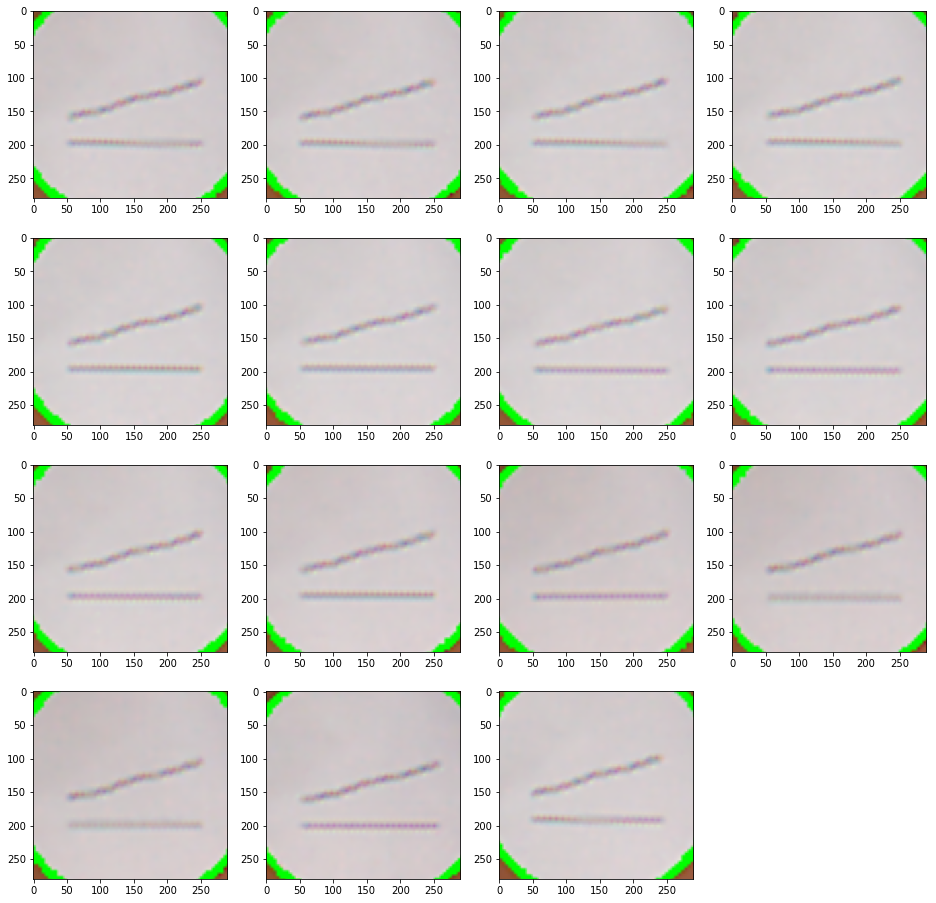

In [132]:
def display_images(images, cmap=None):
    fig = plt.figure(figsize=(16, 16))
    for i in range(1, len(images) + 1):
        fig.add_subplot(4, 4, i)
        plt.imshow(images[i - 1], cmap=cmap)
        
        
    
images = [cv2.imread('../images/warped_plot1.png'),
          cv2.imread('../images/warped_plot2.png'),
          cv2.imread('../images/warped_plot3.png'),
          cv2.imread('../images/warped_plot4.png'),
          cv2.imread('../images/warped_plot5.png'),
          cv2.imread('../images/warped_plot6.png'),
          cv2.imread('../images/warped_plot7.png'),
          cv2.imread('../images/warped_plot8.png'),
          cv2.imread('../images/warped_plot9.png'),
          cv2.imread('../images/warped_plot10.png'),
          cv2.imread('../images/warped_plot11.png'),
          cv2.imread('../images/warped_plot12.png'),
          cv2.imread('../images/warped_plot13.png'),
          cv2.imread('../images/warped_plot14.png'),
          cv2.imread('../images/warped_plot15.png')]

display_images(images)

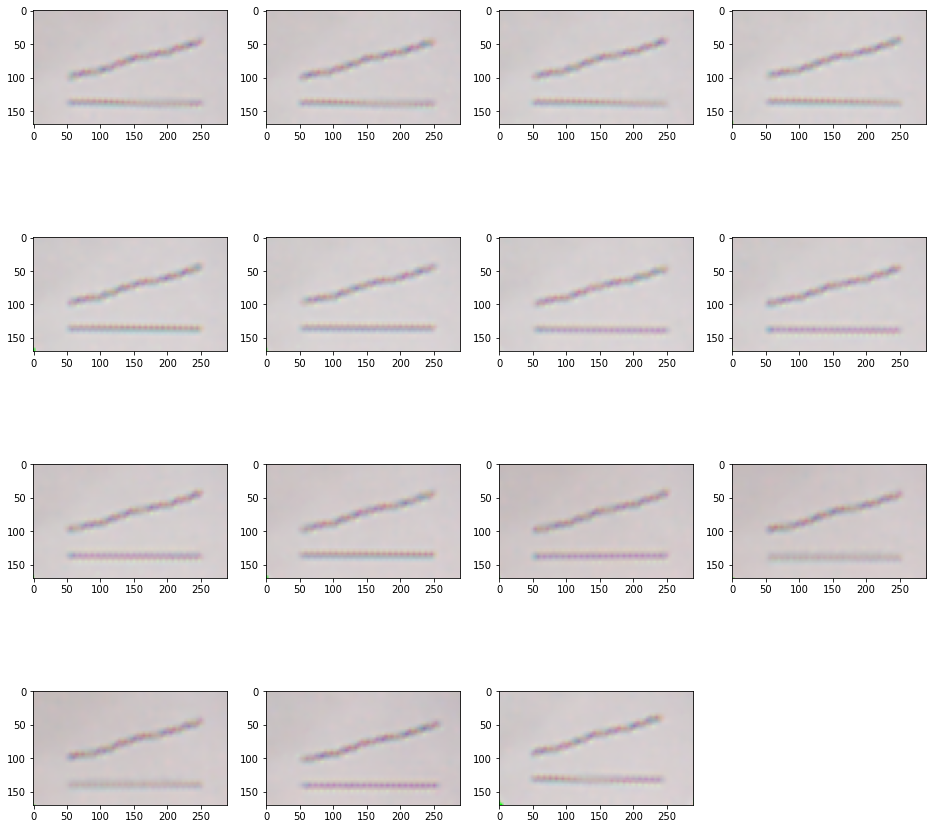

In [133]:
cropped_images = [image[60:230] for image in images]
    
display_images(cropped_images)

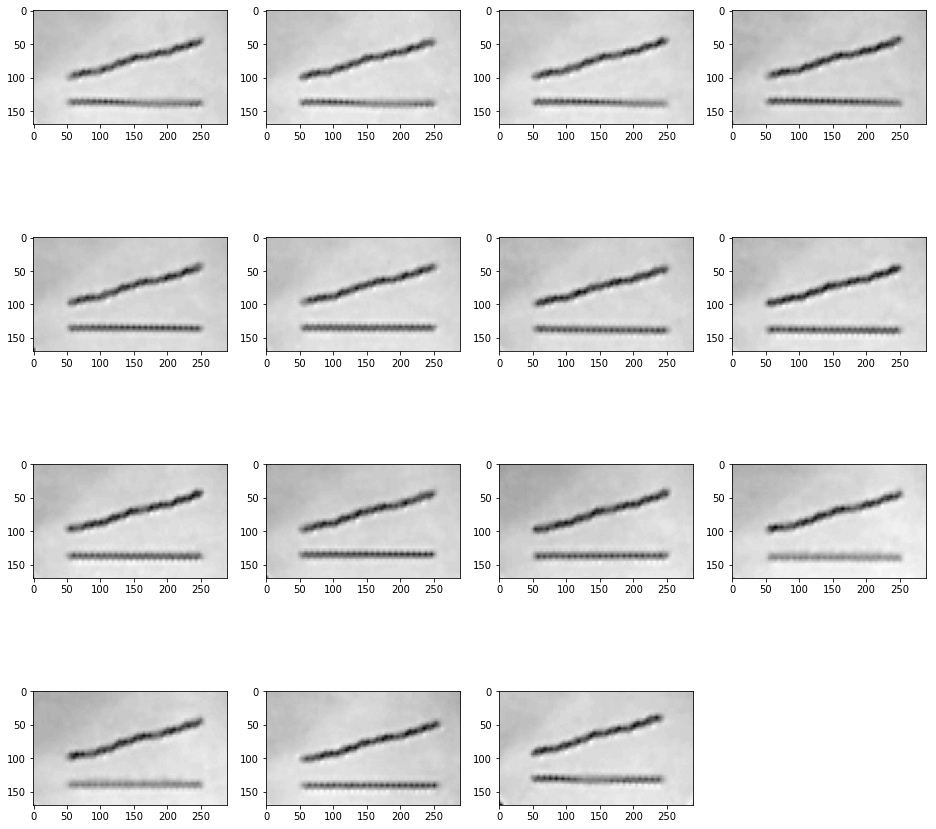

In [134]:
gray_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in cropped_images]

display_images(gray_images, "gray")

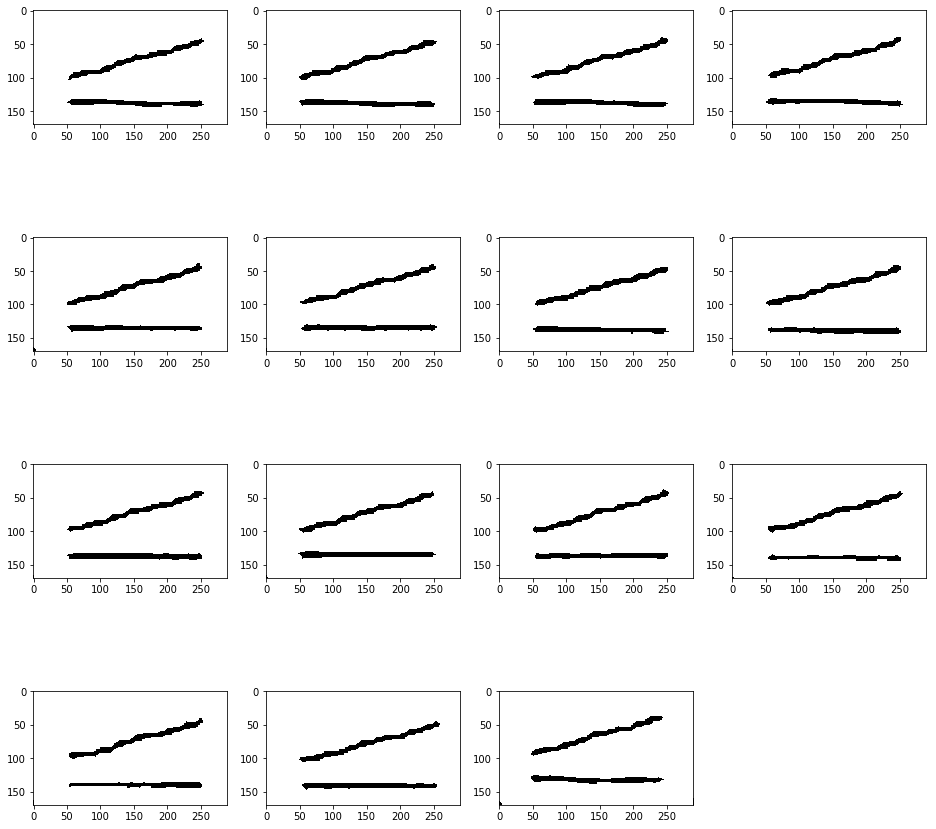

In [135]:
blured_images = [cv2.medianBlur(image, 5) for image in gray_images]
bw_images = [cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) for image in blured_images]

kernel = np.ones((7,7),np.uint8)
cleaned_images = [cv2.erode(image, kernel, iterations = 2) for image in bw_images]
cleaned_images = [cv2.dilate(image, kernel, iterations = 2) for image in cleaned_images]


display_images(cleaned_images, "gray")

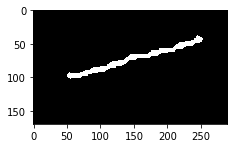

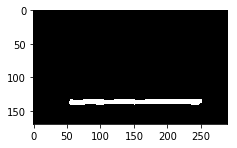

In [219]:
#contours = [cv2.findContours(image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) for image in cleaned_images]
#output = cv2.connectedComponentsWithStats(255-cleaned_images[0], 4, cv2.CV_32S)
#print(cleaned_images[0])
#display_images([cleaned_images[0]])
#print(output)
#display_images([output[1]==3], "gray")

upper_lines = []
lower_lines = []
for image in cleaned_images[10:11]:
    out = cv2.connectedComponentsWithStats(255-image, 4, cv2.CV_32S)
    
    if out[3][1][1] < out[3][2][1]:
        upper_line = out[1]==1
        lower_line = out[1]==2
    else:
        upper_line = out[1]==2
        lower_line = out[1]==1
       
    if np.any(upper_lines):
        upper_lines = np.append(upper_lines, upper_line)
        lower_lines = np.append(lower_lines, lower_line)
    else:
        upper_lines = [upper_line]
        lower_lines = [lower_line]

display_images(upper_lines, "gray")
display_images(lower_lines, "gray")

In [224]:
true_points = np.where(upper_lines[0])
line = np.polyfit(true_points[1], 170-true_points[0],1)
upper_degrees = math.degrees(math.atan(line[0]))

true_points = np.where(lower_lines[0])
line = np.polyfit(true_points[1], 170-true_points[0],1)
lower_degrees = math.degrees(math.atan(line[0]))

angle_diff = upper_degrees - lower_degrees
print(upper_degrees)
print(lower_degrees)
print(angle_diff)


#upper_points = []
#for i, ix in enumerate(true_points[0]):
#    upper_points.append((true_points[0][i], true_points[1][i]))
#    #print(i,ix)
#print(upper_points)


16.0165289971
0.129142444673
15.8873865524
